# Exercises - Time Series

### Exercise 1:

Create a variable with today's date and your time. Then convert it into a datetime object using pandas. Use type to display that it is a datetime object.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
timestamp = '2020-06-21 3:45pm'

In [ ]:
time1 = pd.to_datetime(timestamp)

In [ ]:
time1

In [ ]:
type(time1)

In [ ]:
timestamp = pd.to_datetime(timestamp)

In [ ]:
type(timestamp)

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [4]:
date = ('2016-02-11','2016-07-01','2016-07-09','2016-10-08','2017-02-18','2017-02-25','2017-05-02','2017-08-26','2017-12-15','2018-02-11')
date = pd.to_datetime(date)
num = range (0,10)
data = list(zip(date,num))

In [5]:
df = pd.DataFrame (data = data, columns = ['Date',"Num"])
data_df = df.set_index('Date')
data_df

,Num
Date,
2016-02-11,0
2016-07-01,1
2016-07-09,2
2016-10-08,3
2017-02-18,4
2017-02-25,5
2017-05-02,6
2017-08-26,7
2017-12-15,8


In [7]:
data_df.loc[data_df.index.year ==2017][['Num']]

,Num
Date,
2017-02-18,4
2017-02-25,5
2017-05-02,6
2017-08-26,7
2017-12-15,8


### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [9]:
pd.to_datetime('2017, 12, 15')

Timestamp('2017-12-15 00:00:00')

In [10]:
pd.to_datetime('8th of October 2016')

Timestamp('2016-10-08 00:00:00')

In [11]:
pd.to_datetime('20180211')

Timestamp('2018-02-11 00:00:00')

In [12]:
pd.to_datetime('2017-02-25')

Timestamp('2017-02-25 00:00:00')

In [13]:
pd.to_datetime('2019-Jan-16')

Timestamp('2019-01-16 00:00:00')

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [14]:
pd.timedelta_range(0, periods = 5, freq = '1H45T')

TimedeltaIndex(['00:00:00', '01:45:00', '03:30:00', '05:15:00', '07:00:00'], dtype='timedelta64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [16]:
pd.date_range('2020-06-21', periods = 20)

DatetimeIndex(['2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10'],
              dtype='datetime64[ns]', freq='D')

### Exercise 6:

Download the "travel_times.csv" file and upload it to your datasets folder. Then using pandas, read the file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [18]:
data = pd.read_csv('datasets/travel_times.csv', index_col = 'Date', parse_dates = True)
data.head()

,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
Date,,,,,,,,,,,,
2012-01-06,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
2012-01-06,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2012-01-04,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
2012-01-04,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
2012-01-03,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [19]:
weekly = data['AvgSpeed'].resample('W').mean()
weekly.head()

Date
2011-07-17    64.5250
2011-07-24    75.6125
2011-07-31    71.4100
2011-08-07    72.4000
2011-08-14    71.9600
Freq: W-SUN, Name: AvgSpeed, dtype: float64

Text(0.5, 1.0, 'weekly average speed')

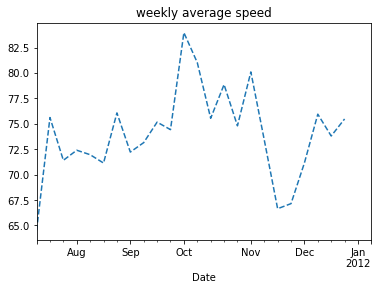

In [21]:
weekly.plot(style=['--'])
plt.title('weekly average speed')

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

In [23]:
by_weekday = data.groupby(data.index.dayofweek)['MovingTime'].mean()
by_weekday.index = ['Mon','Tue','Wed','Thur','Fri']
by_weekday

Mon     38.146154
Tue     38.427083
Wed     39.085106
Thur    37.418182
Fri     35.114815
Name: MovingTime, dtype: float64

Text(0.5, 1.0, 'average moving time by weekday')

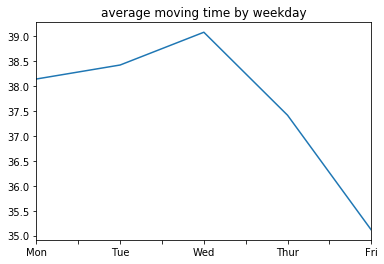

In [24]:
by_weekday.plot(style=[''])
plt.title('average moving time by weekday')

### Exercise 8:

Using the datafram figure out the Avgmoving speed going to GSK on each day and the Avgmoving speed  going to home on each day as well, then plot the graphs. Add a line style this time.

In [25]:
dest = np.where(data['GoingTo'] == 'Home', 'Home', 'GKS')
by_dest = data.groupby([dest, data.index.date])[['AvgSpeed']].mean()


In [26]:
by_dest.head()

AvgSpeed
GKS 2011-07-14      76.2
    2011-07-18      49.9
    2011-07-19      82.3
    2011-07-20      75.7
    2011-07-21      81.5

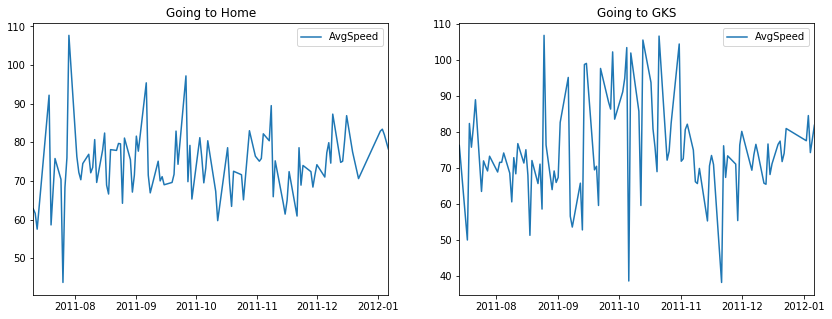

In [27]:
fig, ax = plt.subplots(1,2,figsize = (14,5))
by_dest.loc['Home'].plot(ax = ax[0], title = 'Going to Home', style = '-')
by_dest.loc['GKS'].plot(ax = ax[1], title = 'Going to GKS', style = '-')


### Exercise 9:

Using the dataframe make a new column for the months that are in the dataset.

In [28]:
data['Month'] = data.index.month
data.head()

,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments,Month
Date,,,,,,,,,,,,,
2012-01-06,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN,1
2012-01-06,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN,1
2012-01-04,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN,1
2012-01-04,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN,1
2012-01-03,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN,1


### Exercise 10:

Now with the new months column figure out the average total time that it took to go to home and to go to GSK. Plot both graphs and display it.

In [29]:
dest = np.where(data['GoingTo'] == 'Home', 'Home', 'GKS')
by_dest = data.groupby([dest, data['Month']])[['TotalTime']].mean()


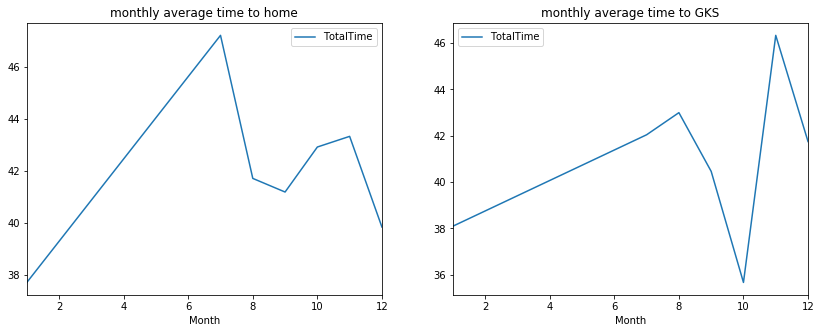

In [30]:
fig, ax = plt.subplots(1,2,figsize = (14,5))
by_dest.loc['Home'].plot(ax = ax[0], title = 'monthly average time to home', style = '-')
by_dest.loc['GKS'].plot(ax = ax[1], title = 'monthly average time to GKS', style = '-')
